# Кейс. Часть первая - анализ

Для начала загрузим их все в датафрейм и нормализуем его

In [1]:
import pandas as pd

comment_data = pd.read_json("data/ranking_train.jsonl", lines=True, orient="records", encoding="windows-1251")
comment_data.rename({"text":"post"}, inplace=True, axis=1)

In [2]:
comment_data

,post,comments
0,How many summer Y Combinator fundees decided n...,[{'text': 'Going back to school is not identic...
1,CBS acquires last.fm for $280m,[{'text': 'It will be curious to see where thi...
2,How Costco Became the Anti-Wal-Mart,[{'text': 'I really hate it when people falsel...
3,"Fortune Favors Big Turds | Screw The Money, Th...",[{'text': 'His real point is that something ca...
4,StartupWeekend: 70 Founders Create One Company...,[{'text': 'Looks like someone hasn't read The ...
...,...,...
88102,Don't upgrade to iOS 8.0.1 or you may experien...,[{'text': 'I had this issue and was able to fi...
88103,Ask HN: How do US HNers get their health insur...,[{'text': 'We use a HSA-qualified high-deducti...
88104,Justin Gordon Using React on Rails,[{'text': 'neat insight! A friend of mine conv...
88105,"iOS 8.0.1 released, broken on iPhone 6 models,...","[{'text': 'Ouch, I feel for whoever let this s..."


Превратим текст нашего поста в индекс

In [3]:
comment_data.set_index("post", inplace=True)
comment_data

,comments
post,
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,[{'text': 'Going back to school is not identic...
CBS acquires last.fm for $280m,[{'text': 'It will be curious to see where thi...
How Costco Became the Anti-Wal-Mart,[{'text': 'I really hate it when people falsel...
"Fortune Favors Big Turds | Screw The Money, This Is My Art",[{'text': 'His real point is that something ca...
StartupWeekend: 70 Founders Create One Company in a Weekend,[{'text': 'Looks like someone hasn't read The ...
...,...
Don't upgrade to iOS 8.0.1 or you may experience “no service”,[{'text': 'I had this issue and was able to fi...
Ask HN: How do US HNers get their health insurance?,[{'text': 'We use a HSA-qualified high-deducti...
Justin Gordon Using React on Rails,[{'text': 'neat insight! A friend of mine conv...


Разобьем списки словарей в колонке с комментариями, чтобы словарь вида "текст:ввв, оценка:1" был на отдельном ряду, согласно совему посту

In [4]:
comment_data = comment_data.explode(column="comments")

In [5]:
comment_data

,comments
post,
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,{'text': 'Going back to school is not identica...
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,{'text': 'There will invariably be those who d...
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,{'text': 'For me school is a way to be connect...
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,{'text': 'I guess it really depends on how hun...
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,{'text': 'I know pollground decided to go back...
...,...
Pay your rent with a Credit or Debit card. No landlord signup required,{'text': 'Most major banks offer a service cal...
Pay your rent with a Credit or Debit card. No landlord signup required,"{'text': 'It costs 3.25%, or $74.25 for the ex..."
Pay your rent with a Credit or Debit card. No landlord signup required,{'text': 'As many other comments have pointed ...


Теперь разобьем словари на колонки

In [6]:
comments = pd.json_normalize(comment_data["comments"])
comments.set_index(comment_data.index, inplace=True)
comments

,text,score
post,,
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,Going back to school is not identical with giv...,0
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,There will invariably be those who don't see t...,1
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,For me school is a way to be connected to what...,2
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,I guess it really depends on how hungry you ar...,3
How many summer Y Combinator fundees decided not to continue with their startup and go back to school? and what were the reasons?,I know pollground decided to go back to school...,4
...,...,...
Pay your rent with a Credit or Debit card. No landlord signup required,Most major banks offer a service called &#x27;...,0
Pay your rent with a Credit or Debit card. No landlord signup required,"It costs 3.25%, or $74.25 for the example of $...",1
Pay your rent with a Credit or Debit card. No landlord signup required,As many other comments have pointed out almost...,2


Сольем колонки, удалим колонки со словарями и ресетнем индекс

Ещё заменим "\&#x27;" на апостроф

In [7]:
comment_data = pd.concat([comment_data, comments], axis=1)
comment_data.drop("comments", axis=1, inplace=True)
comment_data.reset_index(inplace=True)
comment_data['text'] = comment_data['text'].str.replace("&#x27;", "'")
del comments # удаляем перемнную из памяти
comment_data


,post,text,score
0,How many summer Y Combinator fundees decided n...,Going back to school is not identical with giv...,0
1,How many summer Y Combinator fundees decided n...,There will invariably be those who don't see t...,1
2,How many summer Y Combinator fundees decided n...,For me school is a way to be connected to what...,2
3,How many summer Y Combinator fundees decided n...,I guess it really depends on how hungry you ar...,3
4,How many summer Y Combinator fundees decided n...,I know pollground decided to go back to school...,4
...,...,...,...
440530,Pay your rent with a Credit or Debit card. No ...,Most major banks offer a service called 'bill ...,0
440531,Pay your rent with a Credit or Debit card. No ...,"It costs 3.25%, or $74.25 for the example of $...",1
440532,Pay your rent with a Credit or Debit card. No ...,As many other comments have pointed out almost...,2
440533,Pay your rent with a Credit or Debit card. No ...,My apartment building uses Yapstone's RentPaym...,3


Датасет нормализован. Приступаем к анализу

Проанализируем среднюю длину комментариев по оценкам

In [8]:
# найдем длину комментариев
comment_data['comment length'] = comment_data['text'].str.split().str.len()
comment_data

,post,text,score,comment length
0,How many summer Y Combinator fundees decided n...,Going back to school is not identical with giv...,0,181
1,How many summer Y Combinator fundees decided n...,There will invariably be those who don't see t...,1,76
2,How many summer Y Combinator fundees decided n...,For me school is a way to be connected to what...,2,91
3,How many summer Y Combinator fundees decided n...,I guess it really depends on how hungry you ar...,3,64
4,How many summer Y Combinator fundees decided n...,I know pollground decided to go back to school...,4,14
...,...,...,...,...
440530,Pay your rent with a Credit or Debit card. No ...,Most major banks offer a service called 'bill ...,0,73
440531,Pay your rent with a Credit or Debit card. No ...,"It costs 3.25%, or $74.25 for the example of $...",1,48
440532,Pay your rent with a Credit or Debit card. No ...,As many other comments have pointed out almost...,2,44
440533,Pay your rent with a Credit or Debit card. No ...,My apartment building uses Yapstone's RentPaym...,3,31


In [9]:
# сгруппируем по популярности, найдем среднюю и медианную длину
avg_med_len = comment_data.groupby("score")["comment length"].agg(['mean', 'median'])
avg_med_len

,mean,median
score,,
0,138.716549,98.0
1,95.098278,67.0
2,76.704916,53.0
3,65.952217,44.0
4,57.308761,37.0


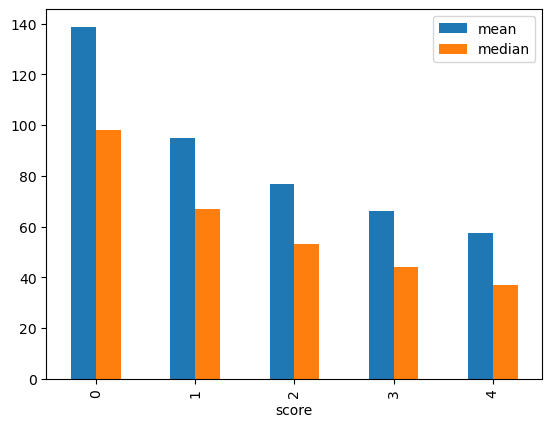

In [10]:
# визуализируем в виде гистограммы
import matplotlib.pyplot as plt

avg_med_len.plot(kind='bar')
plt.show()

Можно увидеть прямую зависимость - более популярные комментарии имеют наибольшую среднюю и медианную длину

Отсюда вытекает рекомендация по словам: если округлять, то пользователю можено рекомендовать писать комментарии длиной от 100 до 140 слов

Начнем с коэффициента сходства Жаккара (Jaccard Similarity). Перед анализом уберем стоп-слова, знаки препинания, цифры и приведем слова к начальной форме

In [11]:
text_scores = comment_data[['text', 'score']]
text_scores

,text,score
0,Going back to school is not identical with giv...,0
1,There will invariably be those who don't see t...,1
2,For me school is a way to be connected to what...,2
3,I guess it really depends on how hungry you ar...,3
4,I know pollground decided to go back to school...,4
...,...,...
440530,Most major banks offer a service called 'bill ...,0
440531,"It costs 3.25%, or $74.25 for the example of $...",1
440532,As many other comments have pointed out almost...,2
440533,My apartment building uses Yapstone's RentPaym...,3


In [12]:
import nltk
import re
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
import string

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def lemmatize_text(text):
    text = w_tokenizer.tokenize(text)
    pos_tags = pos_tag(text)
    return ' '.join([lemmatizer.lemmatize(w[0], get_wordnet_pos(w[1])) for w in pos_tags])

# время работы около 15 минут!
stop_words = stopwords.words('english')
pattern = r'\b(?:{})\b'.format('|'.join(stop_words))
punc_pattern = re.compile(f'[{string.punctuation}]')
num_pattern = re.compile('\d')
text_scores.loc[:, "modified_text"] = text_scores.loc[:, 'text'].str.replace(pattern, '', regex=True)
text_scores.loc[:, "modified_text"] = text_scores.loc[:, 'modified_text'].str.replace(punc_pattern, '', regex=True)
text_scores.loc[:, "modified_text"] = text_scores.loc[:, 'modified_text'].str.replace(num_pattern, '', regex=True)
text_scores.loc[:, "modified_text"] = text_scores.loc[:, 'modified_text'].apply(lemmatize_text)
text_scores

/tmp/ipykernel_174386/2818201192.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_scores.loc[:, "modified_text"] = text_scores.loc[:, 'text'].str.replace(pattern, '', regex=True)
/tmp/ipykernel_174386/2818201192.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_scores.loc[:, "modified_text"] = text_scores.loc[:, 'modified_text'].str.replace(punc_pattern, '', regex=True)
/tmp/ipykernel_174386/2818201192.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,text,score,modified_text
0,Going back to school is not identical with giv...,0,Going back school identical give Some founder ...
1,There will invariably be those who don't see t...,1,There invariably see success set fall back ori...
2,For me school is a way to be connected to what...,2,For school way connect go real world I enter s...
3,I guess it really depends on how hungry you ar...,3,I guess really depend hungry much believe prod...
4,I know pollground decided to go back to school...,4,I know pollground decide go back school get co...
...,...,...,...
440530,Most major banks offer a service called 'bill ...,0,Most major bank offer service call bill pay fr...
440531,"It costs 3.25%, or $74.25 for the example of $...",1,It cost example So look rack quotreward points...
440532,As many other comments have pointed out almost...,2,As many comment point almost everyone debit ca...
440533,My apartment building uses Yapstone's RentPaym...,3,My apartment building use Yapstone RentPayment...


In [13]:
# приводим все к одному регистру
text_scores.loc[:, "modified_text"] = text_scores.loc[:, 'modified_text'].str.lower()
text_scores

/tmp/ipykernel_174386/325421419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_scores.loc[:, "modified_text"] = text_scores.loc[:, 'modified_text'].str.lower()


,text,score,modified_text
0,Going back to school is not identical with giv...,0,going back school identical give some founder ...
1,There will invariably be those who don't see t...,1,there invariably see success set fall back ori...
2,For me school is a way to be connected to what...,2,for school way connect go real world i enter s...
3,I guess it really depends on how hungry you ar...,3,i guess really depend hungry much believe prod...
4,I know pollground decided to go back to school...,4,i know pollground decide go back school get co...
...,...,...,...
440530,Most major banks offer a service called 'bill ...,0,most major bank offer service call bill pay fr...
440531,"It costs 3.25%, or $74.25 for the example of $...",1,it cost example so look rack quotreward points...
440532,As many other comments have pointed out almost...,2,as many comment point almost everyone debit ca...
440533,My apartment building uses Yapstone's RentPaym...,3,my apartment building use yapstone rentpayment...


In [14]:
# добавим колонку текста поста
text_scores["post"] = comment_data["post"]
text_scores

,text,score,modified_text,post
0,Going back to school is not identical with giv...,0,going back school identical give some founder ...,How many summer Y Combinator fundees decided n...
1,There will invariably be those who don't see t...,1,there invariably see success set fall back ori...,How many summer Y Combinator fundees decided n...
2,For me school is a way to be connected to what...,2,for school way connect go real world i enter s...,How many summer Y Combinator fundees decided n...
3,I guess it really depends on how hungry you ar...,3,i guess really depend hungry much believe prod...,How many summer Y Combinator fundees decided n...
4,I know pollground decided to go back to school...,4,i know pollground decide go back school get co...,How many summer Y Combinator fundees decided n...
...,...,...,...,...
440530,Most major banks offer a service called 'bill ...,0,most major bank offer service call bill pay fr...,Pay your rent with a Credit or Debit card. No ...
440531,"It costs 3.25%, or $74.25 for the example of $...",1,it cost example so look rack quotreward points...,Pay your rent with a Credit or Debit card. No ...
440532,As many other comments have pointed out almost...,2,as many comment point almost everyone debit ca...,Pay your rent with a Credit or Debit card. No ...
440533,My apartment building uses Yapstone's RentPaym...,3,my apartment building use yapstone rentpayment...,Pay your rent with a Credit or Debit card. No ...


Далее проанализируем сходства комментариев по разным категориям и текстам поста с помощью коэффициента сходства Жаккара

Начнем с оценок

In [15]:
# распределим комментарии по оценкам

scores0 = text_scores[text_scores["score"]==0]["modified_text"]
scores1 = text_scores[text_scores["score"]==1]["modified_text"]
scores2 = text_scores[text_scores["score"]==2]["modified_text"]
scores3 = text_scores[text_scores["score"]==3]["modified_text"]
scores4 = text_scores[text_scores["score"]==4]["modified_text"]


In [16]:
from nltk.metrics import jaccard_distance

print(f"Коэффициент сходства Жаккара между 0 и 1 популярностью: {1 - jaccard_distance(set(scores0), set(scores1))}")
print(f"Коэффициент сходства Жаккара между 0 и 2 популярностью: {1 - jaccard_distance(set(scores0), set(scores2))}")
print(f"Коэффициент сходства Жаккара между 0 и 3 популярностью: {1 - jaccard_distance(set(scores0), set(scores3))}")
print(f"Коэффициент сходства Жаккара между 0 и 4 популярностью: {1 - jaccard_distance(set(scores0), set(scores4))}")

Коэффициент сходства Жаккара между 0 и 1 популярностью: 0.00010218911799442232
Коэффициент сходства Жаккара между 0 и 2 популярностью: 7.948764534881914e-05
Коэффициент сходства Жаккара между 0 и 3 популярностью: 0.00010789385516096761
Коэффициент сходства Жаккара между 0 и 4 популярностью: 0.0001363473676436744


По оценкам без привязки к теме определить сходство невозможно

Попробуем сравнить комментарии одной темы

In [17]:
# возьмем первую тему и сравним комментарии

scores0 = text_scores.iloc[0, 2]
scores1 = text_scores.iloc[1, 2]
scores2 = text_scores.iloc[2, 2]
scores3 = text_scores.iloc[3, 2]
scores4 = text_scores.iloc[4, 2]

In [18]:
print(f"Коэффициент сходства Жаккара между 0 и 1 популярностью: {1 - jaccard_distance(set(scores0), set(scores1))}")
print(f"Коэффициент сходства Жаккара между 0 и 2 популярностью: {1 - jaccard_distance(set(scores0), set(scores2))}")
print(f"Коэффициент сходства Жаккара между 0 и 3 популярностью: {1 - jaccard_distance(set(scores0), set(scores3))}")
print(f"Коэффициент сходства Жаккара между 0 и 4 популярностью: {1 - jaccard_distance(set(scores0), set(scores4))}")

Коэффициент сходства Жаккара между 0 и 1 популярностью: 0.92
Коэффициент сходства Жаккара между 0 и 2 популярностью: 0.96
Коэффициент сходства Жаккара между 0 и 3 популярностью: 0.9583333333333334
Коэффициент сходства Жаккара между 0 и 4 популярностью: 0.875


In [19]:
print(f"Коэффициент сходства Жаккара между 1 и 2 популярностью: {1 - jaccard_distance(set(scores1), set(scores2))}")
print(f"Коэффициент сходства Жаккара между 1 и 3 популярностью: {1 - jaccard_distance(set(scores1), set(scores3))}")
print(f"Коэффициент сходства Жаккара между 1 и 4 популярностью: {1 - jaccard_distance(set(scores1), set(scores4))}")

Коэффициент сходства Жаккара между 1 и 2 популярностью: 0.8846153846153846
Коэффициент сходства Жаккара между 1 и 3 популярностью: 0.9583333333333334
Коэффициент сходства Жаккара между 1 и 4 популярностью: 0.875


In [20]:
print(f"Коэффициент сходства Жаккара между 2 и 3 популярностью: {1 - jaccard_distance(set(scores2), set(scores3))}")
print(f"Коэффициент сходства Жаккара между 2 и 4 популярностью: {1 - jaccard_distance(set(scores2), set(scores4))}")

Коэффициент сходства Жаккара между 2 и 3 популярностью: 0.92
Коэффициент сходства Жаккара между 2 и 4 популярностью: 0.84


In [21]:
print(f"Коэффициент сходства Жаккара между 3 и 4 популярностью: {1 - jaccard_distance(set(scores3), set(scores4))}")

Коэффициент сходства Жаккара между 3 и 4 популярностью: 0.9130434782608696


Четкой ависимости между сходством и популярностью комментариев не наблюдается

Очевидно, что сходство и темы зависят друг от друга, но это здесь не понадобится, по крайнере мере пока

Проанализируем популярные биграмы комментариях, составя из низ топ 10 и изобразя на графике

In [22]:
# распределяем комментарии и сделаем из них биграммы
from nltk.util import ngrams

scores0 = text_scores[text_scores["score"]==0]["modified_text"].str.split().apply(lambda x: list(ngrams(x, 2))).explode().to_list()
scores1 = text_scores[text_scores["score"]==1]["modified_text"].str.split().apply(lambda x: list(ngrams(x, 2))).explode().to_list()
scores2 = text_scores[text_scores["score"]==2]["modified_text"].str.split().apply(lambda x: list(ngrams(x, 2))).explode().to_list()
scores3 = text_scores[text_scores["score"]==3]["modified_text"].str.split().apply(lambda x: list(ngrams(x, 2))).explode().to_list()
scores4 = text_scores[text_scores["score"]==4]["modified_text"].str.split().apply(lambda x: list(ngrams(x, 2))).explode().to_list()

In [25]:
# функция извлечения топа 10 и рисования графика
from collections import Counter
import matplotlib.pyplot as plt

def count_grams(gram):
    counter = Counter(gram)
    top10 = {' '.join(i[0]):i[1] for i in counter.most_common(10)}
    plt.barh(range(len(top10.keys())), top10.values())
    plt.yticks(range(len(top10.keys())), top10.keys())
    plt.show()
    del counter
    del top10

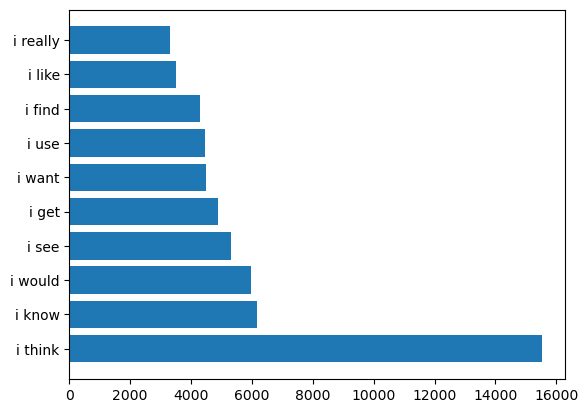

In [25]:
count_grams(scores0)

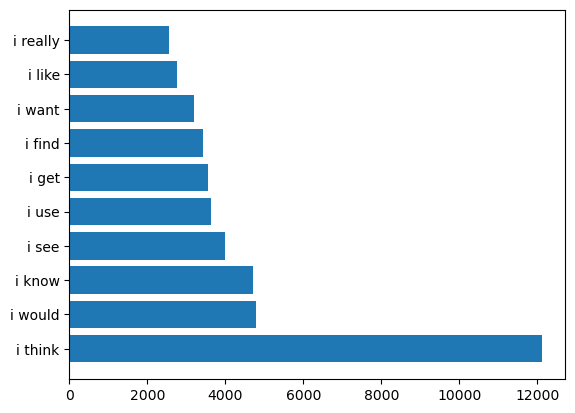

In [26]:
count_grams(scores1)

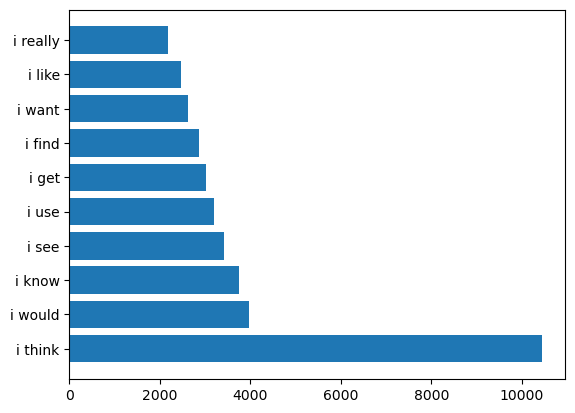

In [27]:
count_grams(scores2)

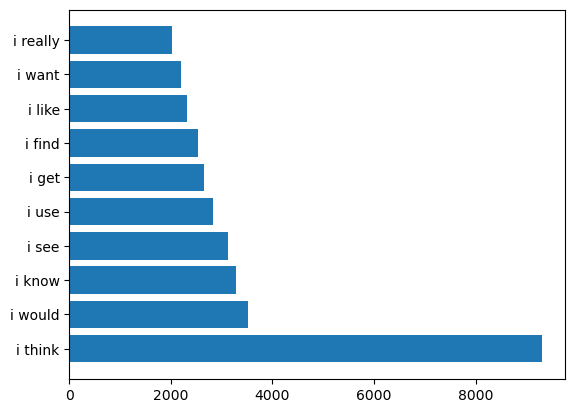

In [28]:
count_grams(scores3)

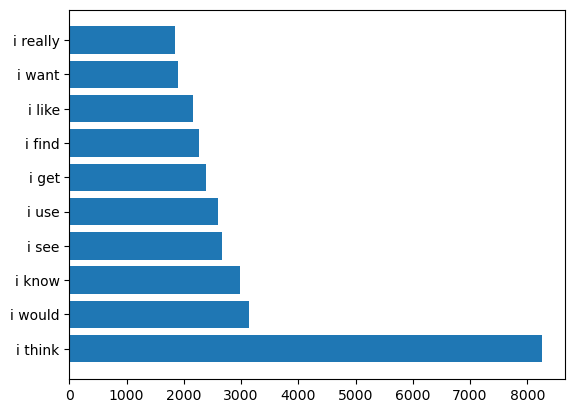

In [29]:
count_grams(scores4)

Анализ биграм ничего не дал. Идем дальше

Проанализируем читабельность комментариев в зависимости от оценки

In [21]:
text_scores

,text,score,modified_text,post
0,Going back to school is not identical with giv...,0,going back school identical give some founder ...,How many summer Y Combinator fundees decided n...
1,There will invariably be those who don't see t...,1,there invariably see success set fall back ori...,How many summer Y Combinator fundees decided n...
2,For me school is a way to be connected to what...,2,for school way connect go real world i enter s...,How many summer Y Combinator fundees decided n...
3,I guess it really depends on how hungry you ar...,3,i guess really depend hungry much believe prod...,How many summer Y Combinator fundees decided n...
4,I know pollground decided to go back to school...,4,i know pollground decide go back school get co...,How many summer Y Combinator fundees decided n...
...,...,...,...,...
440530,Most major banks offer a service called 'bill ...,0,most major bank offer service call bill pay fr...,Pay your rent with a Credit or Debit card. No ...
440531,"It costs 3.25%, or $74.25 for the example of $...",1,it cost example so look rack quotreward points...,Pay your rent with a Credit or Debit card. No ...
440532,As many other comments have pointed out almost...,2,as many comment point almost everyone debit ca...,Pay your rent with a Credit or Debit card. No ...
440533,My apartment building uses Yapstone's RentPaym...,3,my apartment building use yapstone rentpayment...,Pay your rent with a Credit or Debit card. No ...


In [24]:
# посчитаем критерий читабельности - чем больше, тем лучше
from textstat import flesch_reading_ease

text_scores["readability"] = text_scores["text"].apply(lambda x: flesch_reading_ease(x))
text_scores

,text,score,modified_text,post,readability
0,Going back to school is not identical with giv...,0,going back school identical give some founder ...,How many summer Y Combinator fundees decided n...,80.11
1,There will invariably be those who don't see t...,1,there invariably see success set fall back ori...,How many summer Y Combinator fundees decided n...,77.57
2,For me school is a way to be connected to what...,2,for school way connect go real world i enter s...,How many summer Y Combinator fundees decided n...,81.63
3,I guess it really depends on how hungry you ar...,3,i guess really depend hungry much believe prod...,How many summer Y Combinator fundees decided n...,75.24
4,I know pollground decided to go back to school...,4,i know pollground decide go back school get co...,How many summer Y Combinator fundees decided n...,57.27
...,...,...,...,...,...
440530,Most major banks offer a service called 'bill ...,0,most major bank offer service call bill pay fr...,Pay your rent with a Credit or Debit card. No ...,17.51
440531,"It costs 3.25%, or $74.25 for the example of $...",1,it cost example so look rack quotreward points...,Pay your rent with a Credit or Debit card. No ...,87.11
440532,As many other comments have pointed out almost...,2,as many comment point almost everyone debit ca...,Pay your rent with a Credit or Debit card. No ...,73.47
440533,My apartment building uses Yapstone's RentPaym...,3,my apartment building use yapstone rentpayment...,Pay your rent with a Credit or Debit card. No ...,72.02


In [25]:
# посчитаем среднюю читабельность по оценкам популярности

readability_scores = text_scores.groupby("score")["readability"].mean()
readability_scores

score
0    58.324573
1    59.906606
2    59.728345
3    60.551562
4    61.697193
Name: readability, dtype: float64

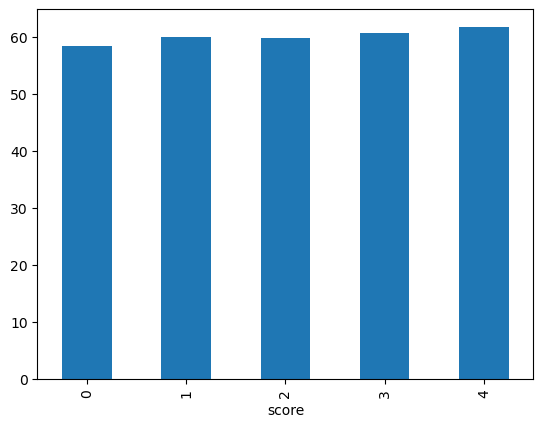

In [28]:
# нарисуем график для наглядности
readability_scores.plot(kind="bar")
plt.show()

Интересное наблюдение - средняя читабельность и популярность комментария обратно пропорциональны. Скорее всего, это связано с уменьшением длины комментария и использованием более простых слов

Вдобавок, в первых и последних пяти строках датасета, можно заметить противоречие: в первом случае читабельность уменьшается, а во втором - увеличивается

\+ в целом читабельность находится на одном уровне и сильно не меняется

Поэтому данная метрика будет проигнорирована

Финальная проверка - узнаем, влияет ли тон комментария на его популярность

In [29]:
from textblob import TextBlob

def sentiment(x):
    x = TextBlob(x).sentiment.polarity
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
text_scores["polarity"] = text_scores["text"].apply(lambda x: sentiment(x))
text_scores    


,text,score,modified_text,post,readability,polarity
0,Going back to school is not identical with giv...,0,going back school identical give some founder ...,How many summer Y Combinator fundees decided n...,80.11,neg
1,There will invariably be those who don't see t...,1,there invariably see success set fall back ori...,How many summer Y Combinator fundees decided n...,77.57,pos
2,For me school is a way to be connected to what...,2,for school way connect go real world i enter s...,How many summer Y Combinator fundees decided n...,81.63,pos
3,I guess it really depends on how hungry you ar...,3,i guess really depend hungry much believe prod...,How many summer Y Combinator fundees decided n...,75.24,pos
4,I know pollground decided to go back to school...,4,i know pollground decide go back school get co...,How many summer Y Combinator fundees decided n...,57.27,neu
...,...,...,...,...,...,...
440530,Most major banks offer a service called 'bill ...,0,most major bank offer service call bill pay fr...,Pay your rent with a Credit or Debit card. No ...,17.51,pos
440531,"It costs 3.25%, or $74.25 for the example of $...",1,it cost example so look rack quotreward points...,Pay your rent with a Credit or Debit card. No ...,87.11,pos
440532,As many other comments have pointed out almost...,2,as many comment point almost everyone debit ca...,Pay your rent with a Credit or Debit card. No ...,73.47,pos
440533,My apartment building uses Yapstone's RentPaym...,3,my apartment building use yapstone rentpayment...,Pay your rent with a Credit or Debit card. No ...,72.02,neg


In [40]:
# посмотрим количесвто положительных, негативных и отрицательных отзывов
polarity_counts = text_scores[["score", "polarity"]]
polarity_counts

,score,polarity
0,0,neg
1,1,pos
2,2,pos
3,3,pos
4,4,neu
...,...,...
440530,0,pos
440531,1,pos
440532,2,pos
440533,3,neg


In [42]:
import numpy as np

polarity_counts["pos"] = np.where(polarity_counts["polarity"]=="pos", 1, 0)
polarity_counts["neg"] = np.where(polarity_counts["polarity"]=="neg", 1, 0)
polarity_counts["neu"] = np.where(polarity_counts["polarity"]=="neu", 1, 0)
polarity_counts

/tmp/ipykernel_174386/3134202616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_counts["pos"] = np.where(polarity_counts["polarity"]=="pos", 1, 0)
/tmp/ipykernel_174386/3134202616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_counts["neg"] = np.where(polarity_counts["polarity"]=="neg", 1, 0)
/tmp/ipykernel_174386/3134202616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,score,polarity,pos,neg,neu
0,0,neg,0,1,0
1,1,pos,1,0,0
2,2,pos,1,0,0
3,3,pos,1,0,0
4,4,neu,0,0,1
...,...,...,...,...,...
440530,0,pos,1,0,0
440531,1,pos,1,0,0
440532,2,pos,1,0,0
440533,3,neg,0,1,0


In [47]:
# построим группировку
polarity_counts.groupby(["score"])[["pos", "neg", "neu"]].sum()

,pos,neg,neu
score,,,
0,69622,14170,4315
1,66199,14972,6936
2,63671,15270,9166
3,61245,15381,11481
4,58684,15492,13931


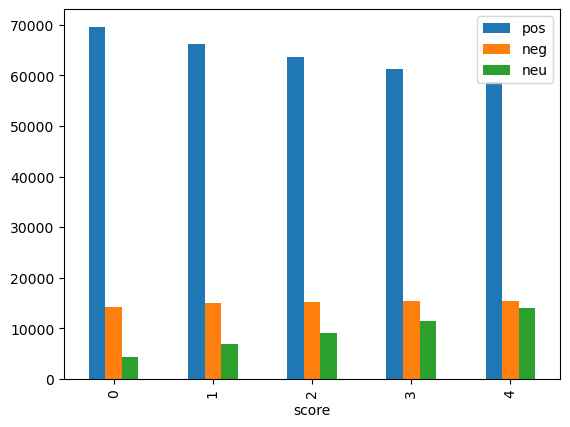

In [46]:
# изобразим на графике
polarity_counts.groupby(["score"])[["pos", "neg", "neu"]].sum().plot(kind="bar")
plt.show()

Исходя из цифр, можно сделать следующие выводы:

- количество негативных комментариев практически одно и то же во всех категориях популярности
- больше всего в каждой категории положительных комментариев
- положительный комментарий имеет больше шансов оказаться популярным
- нейтральный же имеет больше шансов оказаться непопулярным комментарием

Анализ подошел к концу

Из него можно извлечь следующие рекомендации для пользователя:
- писать комментарии длиной 100-140 символов
- воздерживаться от нейтральных комментариев